In [ ]:
import os
new_directory = "/lcrc/project/cosmo_ai/nramachandra/Projects/SPHEREx/MAH/HACCnPaint/Cores/PaintCores_lcx/"  # Replace with the actual path
os.chdir(new_directory)

import numpy as np
import h5py

# %%
import numexpr
# numexpr.set_num_threads(min(8, numexpr.detect_number_of_cores()))
numexpr.set_num_threads(64)

import time
time0 = time.time()
import glob
import pandas as pd

import matplotlib.pyplot as plt
# import haccytrees.mergertrees
# import pygio
# import os

# os.environ["CUDA_32VISIBLE_DEVICES"] = ""

import simulation_models
# import cosmology_utils
# import cores_analysis
import plot_utils
# import lightcone_tree_matching
# import bpl_analysis
import painting
import catalog_io
import yaml_read
import photometry
# import scipy.spatial


%matplotlib inline


# from mpi4py import MPI
from numba import config
config.THREADING_LAYER = 'workqueue'

Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)

In [ ]:
config = yaml_read.yaml_config('config_LJ.yml')
target_skypatch_id = config['hacc_simulation']['skypatchID']
target_skypatch_id = 1
print(target_skypatch_id)

1


In [ ]:
def load_matches_from_h5(output_file):
    combined_data = {}
    with h5py.File(output_file, "r") as f:
        for core_key in f.keys():
            for key in f[core_key].keys():
                if key not in combined_data:
                    combined_data[key] = []
                combined_data[key].append(f[core_key][key][...])
    # Concatenate lists of arrays into single arrays for each key
    for key in combined_data:
        combined_data[key] = np.concatenate(combined_data[key], axis=0)
    return combined_data

output_file = f"../PaintCores_lcx/mocks/finished_mocks/supermock_lightcone_skypatch_{target_skypatch_id}.h5"
# Load matches_for_lc from the HDF5 file
matches_for_lc = load_matches_from_h5(output_file)

print('Available match keys: ', matches_for_lc.keys())
print('Matches: ', matches_for_lc['x'].shape, 'Skypatch: ', target_skypatch_id)

Available match keys:  dict_keys(['central', 'core_state', 'core_tag', 'dec', 'fof_halo_tag', 'merged', 'peak_mass', 'ra', 'rank_peak_mass', 'redshift', 'sfh', 'stellar_mass', 't25_a1', 't50_a1', 'time_infall', 'vx', 'vy', 'vz', 'x', 'y', 'z'])
Matches:  (36164872,) Skypatch:  1


In [ ]:
cosmo = simulation_models.get_cosmo(config['hacc_simulation']['name'])

In [ ]:
match_redshift = matches_for_lc['redshift']#[:1000]
match_sfh = matches_for_lc['sfh'][:, np.newaxis, :]#[:1000]
central_cond = matches_for_lc['central']
merged_cond = matches_for_lc['merged']

In [ ]:
match_sfh.shape, match_redshift.shape, matches_for_lc['peak_mass'].shape, matches_for_lc['stellar_mass'].shape

((36164872, 1, 117), (36164872,), (36164872,), (36164872,))

In [ ]:
# central_cond

/lcrc/project/cosmo_ai/nramachandra/Projects/SPHEREx/MAH/HACCnPaint/Cores/PaintCores_lcx/plot_utils.py:406: RuntimeWarning: invalid value encountered in log10
  corner.hist2d( x=np.log10(Mpeak),


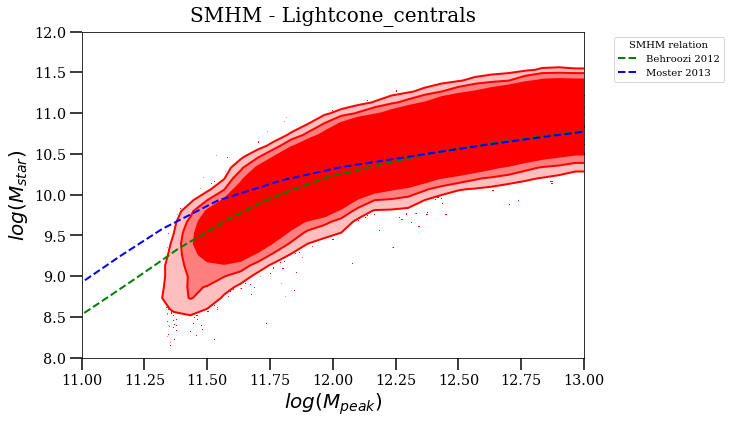

<Figure size 432x288 with 0 Axes>

In [ ]:
# plt.hist(np.log10(matches_for_lc['peak_mass']), alpha=0.5, bins=100);
plot_utils.plot_SMHM_comparison(matches_for_lc['peak_mass'][::1], matches_for_lc['stellar_mass'][::1], 'Lightcone_centrals')
# plt.hist(matches_for_lc['redshift'], alpha=0.5, bins=100);
# plot_utils.basemap_plot(matches_for_lc['ra'], matches_for_lc['dec'])
# plt.hist(np.log10(matches_for_lc[0]['stellar_mass']), alpha=0.5, bins=100);
# plt.plot(matches_for_lc['sfh'][0:10].T, alpha=0.5); 
# plt.yscale('log')
# plt.ylim(1e-3, )

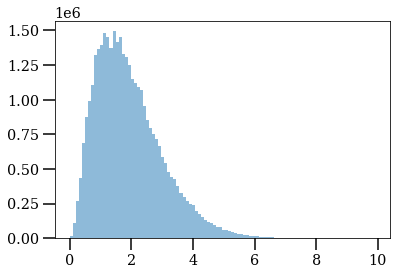

In [ ]:
# plt.hist(np.log10(matches_for_lc['peak_mass']), alpha=0.5, bins=100);
# plot_utils.plot_SMHM_comparison(matches_for_lc['peak_mass'], matches_for_lc['stellar_mass'], 'Lightcone_centrals')
plt.hist(matches_for_lc['redshift'], alpha=0.5, bins=100);
# plot_utils.basemap_plot(matches_for_lc['ra'], matches_for_lc['dec'])
# plt.hist(np.log10(matches_for_lc[0]['stellar_mass']), alpha=0.5, bins=100);
# plt.plot(matches_for_lc['sfh'][0:10].T, alpha=0.5);

In [ ]:
# match_redshift.shape, match_sfh.shape, wave.shape, reds.shape

## Loading paint

In [ ]:
def load_matches_from_h5(output_file):
    combined_data = {}
    with h5py.File(output_file, "r") as f:
        for key in f.keys():
            combined_data[key] = f[key][...]  # Read the entire dataset into memory
    return combined_data

In [ ]:
output_file = f"../PaintCores_lcx/mocks/paint_models/finished_paints/paint_preds_skypatch_{target_skypatch_id}.h5"

sed_for_lc = load_matches_from_h5(output_file)

print('Available match keys: ', sed_for_lc.keys())
print('Matches: ', sed_for_lc['SED'].shape, 'Skypatch: ', target_skypatch_id)

Available match keys:  dict_keys(['SED', 'core_tag'])
Matches:  (36164872, 1963) Skypatch:  1


In [ ]:
sed_for_lc['SED'].shape

(36164872, 1963)

In [ ]:
matches_for_lc

{'central': array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
 'core_state': array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 'core_tag': array([324424061260136853, 342438459769619034, 342438459769618493, ...,
        734249462687345571, 698225063714881668, 734253860733849365]),
 'dec': array([66.474, 66.48 , 66.461, ..., 66.602, 67.052, 66.701]),
 'fof_halo_tag': array([736926903398, 737042551913, 736002037870, ..., 709124086206,
        720337863108, 721147004674]),
 'merged': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'peak_mass': array([4.161e+13, 4.161e+13, 4.161e+13, ..., 9.158e+11, 6.030e+12,
        2.560e+12], dtype=float32),
 'ra': array([230.992, 230.982, 230.975, ..., 180.032, 180.024, 180.085]),
 'rank_peak_mass': array([6.305e-11, 0.000e+00, 7.881e-12, ..., 3.870e-09, 3.822e-09,
        4.051e-09]),
 'redshift': array([5.329, 5.317, 5.282, ..., 2.097, 2.079, 2.019]),
 'sfh': array([[0.   , 0.   , 0.   , ..., 0.066, 0.086, 0.097],
        [0.   , 0.   , 0.   , ..., 0.066, 0.086

In [ ]:
# adsdsdasdfd

## SuperMock storage and compute

### Memory: 
* 2TB nodes, 128 cores each. 

### Storage: 
* Galaxy-Halo connection: 192 x 14 G = 2.7TB
* SEDs: 192 x  246G = 48 TB
* Photometry: 192 x 16G = 3.1 TB


### Compute: 
* Galaxy-Halo connection: 6.27x192 ‎ = 1,203.84 hours
* SEDs: 3.28 x 192 ‎ = 629.76 hours
* Photometry: 45 x 192 ‎ = 8,640 hours

### Total galaxies 

In [ ]:
(matches_for_lc['core_tag'] == sed_for_lc['core_tag']).all()

True

In [ ]:
dirIn1 = '/lcrc/project/cosmo_ai/nramachandra/Projects/SPHEREx/MAH/TrainingData/Data/Damp_red_centrals_100k_z10/'
dirIn2 = '/lcrc/project/cosmo_ai/nramachandra/Projects/SPHEREx/MAH/TrainingData/Data/Damp_red_noncentrals_100k_z10/'

nranks = 16
rnd_seed = 42
wave_cen = np.concatenate([np.load(dirIn1 + 'wave_spec' + str(rnd_seed) + '_rank' + str(rank) + '.npy') for rank in range(nranks)], axis=0)
reds_cen = np.concatenate([np.load(dirIn1 +'redshift' + str(rnd_seed) + '_rank' + str(rank) + '.npy') for rank in range(nranks)], axis=0)
wave_unred_cen = wave_cen/(1+reds_cen)[:, np.newaxis]

nranks = 16
rnd_seed = 14
wave_sat = np.concatenate([np.load(dirIn2 + 'wave_spec' + str(rnd_seed) + '_rank' + str(rank) + '.npy') for rank in range(nranks)], axis=0)
reds_sat = np.concatenate([np.load(dirIn2 +'redshift' + str(rnd_seed) + '_rank' + str(rank) + '.npy') for rank in range(nranks)], axis=0)
wave_unred_sat = wave_sat/(1+reds_sat)[:, np.newaxis]

print('(wave_unred_cen[0] - wave_unred_sat[0]).min() = ', (wave_unred_cen[0] - wave_unred_sat[0]).min()) 

wave_unred = wave_unred_cen[0]

(wave_unred_cen[0] - wave_unred_sat[0]).min() =  -1.4901161193847656e-08


In [ ]:
# merged_cond[gal_idx]

/lcrc/project/cosmo_ai/nramachandra/Projects/tmp/ipykernel_409737/4224009666.py:16: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


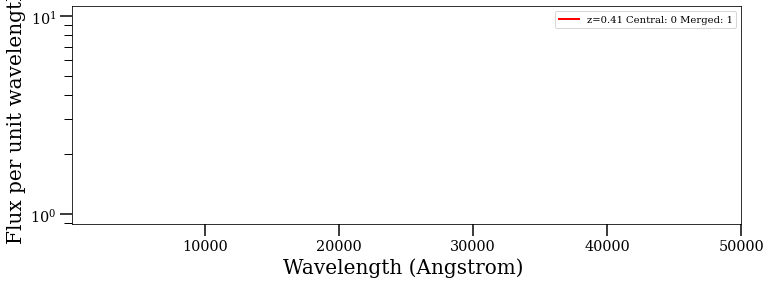

In [ ]:
wave_min = config['painting_model']['wave_min']
wave_max = config['painting_model']['wave_max']


gal_idx = 32503344
each_wave_red = wave_unred*(1 + match_redshift[gal_idx])
each_sed = sed_for_lc['SED'][gal_idx]


plt.figure(21, figsize = (12, 4))
plt.plot(each_wave_red, each_sed, color='r', label='z=%.2f'%match_redshift[gal_idx] + ' Central: %d'%central_cond[gal_idx] + ' Merged: %d'%merged_cond[gal_idx]);
plt.xlim(wave_min, wave_max)
plt.ylabel('Flux per unit wavelength')
plt.xlabel('Wavelength (Angstrom) ')
plt.legend()
plt.yscale('log')

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import ListedColormap
from getdist import plots, MCSamples
import corner
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as mcolors  

def plot_SED(pcolor_all, wave_unnred, redshift_in, wave_min, wave_max, plt_title):
    plt.clf()
    plt.close('all')
    
    np.random.seed(3)
    plt.figure(figsize = (12, 4))

    # galID_arr =  np.arange(0, pcolor_all.shape[1])
    galID_arr =  np.random.randint(0, pcolor_all.shape[0], 5)

    colorparams = galID_arr
    colormap = plt.get_cmap('viridis', 10)
    normalize = mcolors.Normalize(vmin=np.min(colorparams), vmax=np.max(colorparams))


    for idx, galID in enumerate(galID_arr):
        print(idx, galID)
        print(wave_unnred.shape)

        color = colormap(normalize(galID))

        # wave_mask = np.where( (wave_unnred[0]>wave_min) & (wave_unnred[0]<wave_max))
        wave_mask = np.where( (wave_unnred>wave_min) & (wave_unnred<wave_max))
        # wave_mask = True
        
        each_wave_red = wave_unnred[wave_mask]*(1 + redshift_in[galID])
        
        print(each_wave_red.shape, pcolor_all[galID, wave_mask][0].shape, redshift_in[galID], each_wave_red.shape)

        plt.plot(each_wave_red, pcolor_all[galID, wave_mask][0],  color = color, alpha=1, label='z=%.2f'%redshift_in[galID]);
        
        # plt.plot(wave, np.median(pcolor_all[:, galID, :].T, axis=1)*1./(4*np.pi*dd1**2),  color = color, alpha=1, linewidth = 0.8, label='z=%.2f'%redshift_in[0, idx]);
        # plt.plot(wave, np.median(pcolor_all[:, galID, :].T, axis=1),  color = color, alpha=1, linewidth = 0.8, linestyle = '-.', label='z=%.2f'%redshift_in[0, idx]);


    plt.ylabel('Flux per unit wavelength')
    plt.xlabel('Wavelength (Angstrom) ')

    plt.yscale('log')
    plt.legend(ncol=1, title='Redshift')
    plt.xlim(wave_min, wave_max)

    # plt.savefig('plots/sed_'+ plt_title +'.png',bbox_inches='tight',dpi = 300)
    plt.show()

In [ ]:
sed_for_lc['SED'][0:20].shape, match_redshift[0:20].shape, wave_unred.shape, config['painting_model']['wave_min'], config['painting_model']['wave_max']

((20, 1963), (20,), (1963,), 90, 50000)

0 16848746
(1963,)
(1052,) (1052,) 4.129379869050223 (1052,)
1 35325592
(1963,)
(1052,) (1052,) 1.2628765825445791 (1052,)
2 21572857
(1963,)
(1052,) (1052,) 0.7022102966366082 (1052,)
3 29254421
(1963,)
(1052,) (1052,) 1.7752718555772091 (1052,)
4 9972733
(1963,)
(1052,) (1052,) 2.881052717921183 (1052,)


/lcrc/project/cosmo_ai/nramachandra/Projects/tmp/ipykernel_409737/3482534514.py:48: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


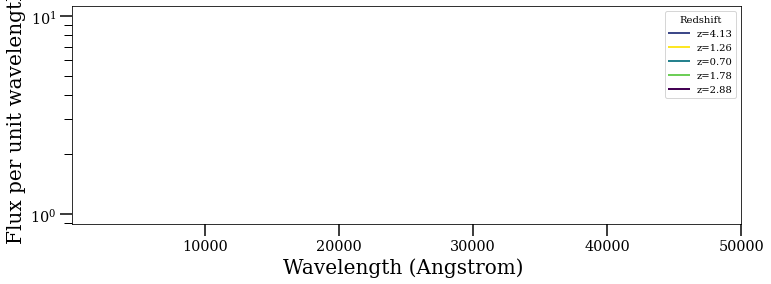

In [ ]:
plot_SED(sed_for_lc['SED'], wave_unred, match_redshift, config['painting_model']['wave_min'], config['painting_model']['wave_max'], "Random")

In [ ]:
np.random.randint(0, 12, size=5)

array([ 3, 10, 11,  9,  9])

In [ ]:
# def load_model_and_scalers(model_path, scaler_input_path, scaler_output_path):
#     model = load_model(model_path)
#     with open(scaler_input_path, 'rb') as f:
#         scaler_input = pickle.load(f)
#     with open(scaler_output_path, 'rb') as f:
#         scaler_output = pickle.load(f)
#     return model, scaler_input, scaler_output

In [ ]:
# model_path = './trained_painting_NNs/spec_mlp_eline_damp_central_noncentral_z10.h5'  # Adjust as needed
# scaler_input_path = './trained_painting_NNs/eline_input_scale_damp_central_noncentral_z10.pkl'
# scaler_output_path = './trained_painting_NNs/eline_output_scale_damp_central_noncentral_z10.pkl'

In [ ]:
# abdsdwsewds

## Painting Central

In [ ]:
# mlp_central, scaler, scaler_y, wave, reds = painting.load_pretrained_models(config['painting_model']['model_dir'], 
#                                                                             config['painting_model']['wavelength_dir'], 
#                                                                             "Central")

# ######################

# plot_frequency = config['painting_model']['plot_frequency']
# plot_frequency = 1

# ######################
# pcolor_all, wave_unnred, redshift_in, sfh_in = painting.paint_sed(mlp_central, scaler, scaler_y, 
#                                                                   match_redshift, match_sfh, 
#                                                                   wave, reds, plot_frequency)


# match_lum = painting.calc_luminosity(pcolor_all, wave_unnred, redshift_in, cosmo, config['painting_model']['wave_min'], config['painting_model']['wave_max'])

# # match_ra, match_dec = cosmology_utils.ra_dec(match_xyz[::plot_frequency, 0], 
# #                              match_xyz[::plot_frequency, 1], 
# #                              match_xyz[::plot_frequency, 2])

# plot_utils.plot_skymap(match_ra, match_dec, alphaq_sm[::plot_frequency, 0], match_lum, "Central")
# plot_utils.plot_SED(pcolor_all, wave_unnred, redshift_in, config['painting_model']['wave_min'], config['painting_model']['wave_max'], "Central")

In [ ]:
from scipy.integrate import simps
from scipy.interpolate import interp1d as interp1d
import glob
import matplotlib.pylab as plt
import pickle

In [ ]:
#SPHEREx bands
def load_indiv_filter(filtfile, 
                      norm=True):
    
    bandpass_name = filtfile.split('.')[0].split('/')[-1]
    
    x = np.loadtxt(filtfile)
    nonz = (x[:,1] != 0.)
    bandpass_wav = x[nonz,0]*1e-4
    bandpass_val = x[nonz,1]

    if norm:
        bandpass_val /= np.sum(bandpass_val)

    cenwav = np.dot(bandpass_wav, bandpass_val)
    # cenwav = np.dot(x[nonz,0], x[nonz,1])

    return bandpass_wav, bandpass_val, cenwav, bandpass_name


def load_sphx_filters(filtdir='data/spherex_filts/', 
                      to_um=True):

    ''' 
    Loads files, returns list of central wavelengths and list of wavelengths/filter responses. 
    Converts wavelengths to microns unless otherwise specified.
    '''

    bandpass_wavs, bandpass_vals, central_wavelengths, bandpass_names = [], [], [], []
    bband_idxs = np.arange(1, 7)
    
    for bandidx in bband_idxs:
        filtfiles = glob.glob(filtdir+'SPHEREx_band'+str(bandidx)+'*.dat')
        for filtfile in filtfiles:

            bandpass_wav, bandpass_val, cenwav, bandpass_name = load_indiv_filter(filtfile)
            bandpass_names.append(bandpass_name)

            bandpass_wavs.append(bandpass_wav)
            bandpass_vals.append(bandpass_val)
            central_wavelengths.append(cenwav)

    return np.array(central_wavelengths), np.array(bandpass_wavs), np.array(bandpass_vals), np.array(bandpass_names)



## SDSS bands

def load_indiv_filter_sdss(filtfile, 
                           norm=True):
    
    bandpass_name = filtfile.split('.')[0].split('/')[-1]
    
    x = np.loadtxt(filtfile)
    nonz = (x[:,1] != 0.)
    bandpass_wav = x[nonz,0]*1e-4
    bandpass_val = x[nonz,1]

    if norm:
        bandpass_val /= np.sum(bandpass_val)

    cenwav = np.dot(bandpass_wav, bandpass_val)
    # cenwav = np.dot(x[nonz,0], x[nonz,1])

    return bandpass_wav, bandpass_val, cenwav, bandpass_name

def load_sdss_filters(filtdir='data/sdss_filts/', 
                      to_um=True):

    ''' 
    Loads files, returns list of central wavelengths and list of wavelengths/filter responses. 
    Converts wavelengths to microns unless otherwise specified.
    '''

    bandpass_wavs, bandpass_vals, central_wavelengths, bandpass_names = [], [], [], []
    bband_idxs = ['u', 'g', 'r', 'i', 'z']
    
    for bandidx in bband_idxs:
        filtfiles = glob.glob(filtdir+'SLOAN_SDSS.'+str(bandidx)+'*.dat')
        for filtfile in filtfiles:
            

            bandpass_wav, bandpass_val, cenwav, bandpass_name = load_indiv_filter_sdss(filtfile)
            bandpass_names.append(bandpass_name)

            bandpass_wavs.append(bandpass_wav)
            bandpass_vals.append(bandpass_val)
            central_wavelengths.append(cenwav)

    return np.array(central_wavelengths), np.array(bandpass_wavs), np.array(bandpass_vals), np.array(bandpass_names)



def load_survey_pickle(survey, 
                       all_filters_pickle):
    
    spherex_filter_pickle, lsst_filter_pickle, cosmos_filter_pickle, wise_filter_pickle, ls_filter_pickle, mass2_filter_pickle, f784_filter_pickle = all_filters_pickle
    
    
    if (survey=='LSST'):
        FILTER_NAME = lsst_filter_pickle
    elif (survey=='SPHEREx'):
        FILTER_NAME = spherex_filter_pickle
    elif (survey=='COSMOS'):
        FILTER_NAME = cosmos_filter_pickle
    elif (survey=='WISE'):
        FILTER_NAME = wise_filter_pickle
    elif (survey=='LEGACYSURVEY'):
        FILTER_NAME = ls_filter_pickle
    elif (survey=='2MASS'):
        FILTER_NAME = mass2_filter_pickle
    elif (survey=='F784'):
        FILTER_NAME = f784_filter_pickle
         
        
    else: 
        raise NotImplementedError("Filter specifications not included")
        
    with open(FILTER_NAME, 'rb') as f:
     central_wavelengths, bandpass_wavs, bandpass_vals, bandpass_names = pickle.load(f)
    
    return central_wavelengths, bandpass_wavs, bandpass_vals, bandpass_names


def clip_bandpass_vals(bandpass_wavs, 
                       bandpass_vals):
    
    all_clip_bandpass_wav, all_clip_bandpass_vals = [], []

    for b in range(len(bandpass_wavs)):
        nonz_bandpass_val = (bandpass_vals[b] > 0)
        clip_bandpass_wav = bandpass_wavs[b][nonz_bandpass_val]
        clip_bandpass_vals = bandpass_vals[b][nonz_bandpass_val]
        all_clip_bandpass_wav.append(clip_bandpass_wav)
        all_clip_bandpass_vals.append(clip_bandpass_vals)

    return all_clip_bandpass_wav, all_clip_bandpass_vals


def sed_to_mock_phot(central_wavelengths, 
                     sed_um_wave, 
                     sed_mJy_flux, 
                     bandpass_wavs, 
                     bandpass_vals, 
                     interp_kind='linear', 
                     plot=True, 
                     clip_bandpass=True):
    
    # central wavelengths in micron
    if clip_bandpass:
        all_clip_bandpass_wav, all_clip_bandpass_vals = clip_bandpass_vals(bandpass_wavs, bandpass_vals)

    sed_interp = interp1d(sed_um_wave,
                          sed_mJy_flux,
                          kind=interp_kind,
                          bounds_error=False, 
                          fill_value = 0.0)

    band_fluxes = np.zeros_like(central_wavelengths)

    for b, bandpass_wav in enumerate(bandpass_wavs):
        # fluxes in mJy
        if clip_bandpass:
            band_fluxes[b] = np.dot(all_clip_bandpass_vals[b], sed_interp(all_clip_bandpass_wav[b]))
        else:
            band_fluxes[b] = np.dot(bandpass_vals[b], sed_interp(bandpass_wav))

    flux = 1e3*band_fluxes # uJy
    appmag_ext = -2.5*np.log10(flux)+23.9

    if plot:

        wav_um = np.array(central_wavelengths)

        plt.figure(figsize=(12, 4))
        plt.title('sed uJy flux')
        plt.plot(sed_um_wave, 1e3*sed_mJy_flux, color='k', zorder=5, alpha=0.5)
        plt.scatter(wav_um, flux, color='r', label='bandpass-convolved fluxes', s=30)
        # plt.ylim(0, 1.2*np.max(flux))
        plt.xlabel('um', fontsize=16)
        plt.ylabel('uJy', fontsize=16)
        plt.tick_params(labelsize=14)
        plt.legend()
        plt.show()
        
    plt.close("all")

    return flux, appmag_ext, band_fluxes


In [ ]:

def photometric_bandpass(pcolor_all, wave_unnred, redshift_in, all_filter_pickle, wave_lims):

    lsst_mags = np.zeros(shape=(pcolor_all.shape[0], 6))
    spherex_mags = np.zeros(shape=(pcolor_all.shape[0], 102))
    cosmos_mags = np.zeros(shape=(pcolor_all.shape[0], 31))
    wise_mags = np.zeros(shape=(pcolor_all.shape[0], 7))
    ls_mags = np.zeros(shape=(pcolor_all.shape[0], 8))
    mass2_mags = np.zeros(shape=(pcolor_all.shape[0], 3))
    f784_mags = np.zeros(shape=(pcolor_all.shape[0], 2))


    
    for galID in range(pcolor_all.shape[0]):


        # redsh = redshift_in[0, galID]
        redsh = redshift_in[galID]

        # wave_red_cuts = wave_unnred[:, np.where( (wave_unnred[0]>wave_lims[0]) & (wave_unnred[0]<wave_lims[1]) )][0, 0, :]*(1 + redsh)

        wave_mask = np.where( (wave_unnred>wave_lims[0]) & (wave_unnred<wave_lims[1]))
        
        wave_red_cuts = wave_unnred[wave_mask]*(1 + redshift_in[galID])
        
        sed_um_wave = wave_red_cuts/1e4
        # sed_mJy_flux = unscale(mag_test, scaler_y)[galID]*1e-3 #mJy
        
        # sed_mJy_flux =  pcolor_all[0, galID, :].T*1e3        
        sed_mJy_flux = pcolor_all[galID, wave_mask][0]*1e3
        


        # central_wavelengths, bandpass_wavs, bandpass_vals, bandpass_names = painting.load_sphx_filters(filtdir=spherex_filters_dir, to_um=True)
        central_wavelengths, bandpass_wavs, bandpass_vals, bandpass_names = load_survey_pickle('SPHEREx', all_filter_pickle)

        flux_spherex, appmag_ext_spherex, band_fluxes_spherex = sed_to_mock_phot(central_wavelengths, 
                                                         sed_um_wave, 
                                                         sed_mJy_flux, 
                                                         bandpass_wavs, 
                                                         bandpass_vals, 
                                                         interp_kind='linear', 
                                                         plot=False, 
                                                         clip_bandpass=True)


        # central_wavelengths, bandpass_wavs, bandpass_vals, bandpass_names = painting.load_lsst_filters(filtdir=sdss_filters_dir, to_um=True)
        central_wavelengths, bandpass_wavs, bandpass_vals, bandpass_names = load_survey_pickle('LSST', all_filter_pickle)

        flux_lsst, appmag_ext_lsst, band_fluxes_lsst = sed_to_mock_phot(central_wavelengths, 
                                                         sed_um_wave, 
                                                         sed_mJy_flux, 
                                                         bandpass_wavs, 
                                                         bandpass_vals, 
                                                         interp_kind='linear', 
                                                         plot=False, 
                                                         clip_bandpass=True)





        central_wavelengths, bandpass_wavs, bandpass_vals, bandpass_names = load_survey_pickle('COSMOS', all_filter_pickle)

        flux_cosmos, appmag_ext_cosmos, band_fluxes_cosmos = sed_to_mock_phot(central_wavelengths, 
                                                         sed_um_wave, 
                                                         sed_mJy_flux, 
                                                         bandpass_wavs, 
                                                         bandpass_vals, 
                                                         interp_kind='linear', 
                                                         plot=False, 
                                                         clip_bandpass=True)

        central_wavelengths, bandpass_wavs, bandpass_vals, bandpass_names = load_survey_pickle('WISE', all_filter_pickle)

        flux_wise, appmag_ext_wise, band_fluxes_wise = sed_to_mock_phot(central_wavelengths, 
                                                         sed_um_wave, 
                                                         sed_mJy_flux, 
                                                         bandpass_wavs, 
                                                         bandpass_vals, 
                                                         interp_kind='linear', 
                                                         plot=False, 
                                                         clip_bandpass=True)

        central_wavelengths, bandpass_wavs, bandpass_vals, bandpass_names = load_survey_pickle('LEGACYSURVEY', all_filter_pickle)

        flux_ls, appmag_ext_ls, band_fluxes_ls = sed_to_mock_phot(central_wavelengths, 
                                                         sed_um_wave, 
                                                         sed_mJy_flux, 
                                                         bandpass_wavs, 
                                                         bandpass_vals, 
                                                         interp_kind='linear', 
                                                         plot=False, 
                                                         clip_bandpass=True)


        central_wavelengths, bandpass_wavs, bandpass_vals, bandpass_names = load_survey_pickle('2MASS', all_filter_pickle)

        flux_2mass, appmag_ext_2mass, band_fluxes_2mass = sed_to_mock_phot(central_wavelengths, 
                                                         sed_um_wave, 
                                                         sed_mJy_flux, 
                                                         bandpass_wavs, 
                                                         bandpass_vals, 
                                                         interp_kind='linear', 
                                                         plot=False, 
                                                         clip_bandpass=True)

        central_wavelengths, bandpass_wavs, bandpass_vals, bandpass_names = load_survey_pickle('F784', all_filter_pickle)

        flux_f784, appmag_ext_f784, band_fluxes_f784 = sed_to_mock_phot(central_wavelengths, 
                                                         sed_um_wave, 
                                                         sed_mJy_flux, 
                                                         bandpass_wavs, 
                                                         bandpass_vals, 
                                                         interp_kind='linear', 
                                                         plot=False, 
                                                         clip_bandpass=True)




        lsst_mags[galID] = appmag_ext_lsst
        spherex_mags[galID] = appmag_ext_spherex
        cosmos_mags[galID] = appmag_ext_cosmos
        wise_mags[galID] = appmag_ext_wise
        ls_mags[galID] = appmag_ext_ls
        mass2_mags[galID] = appmag_ext_2mass
        f784_mags[galID] = appmag_ext_f784
    

    return lsst_mags, spherex_mags, cosmos_mags, wise_mags, ls_mags, mass2_mags, f784_mags

In [ ]:
# bandpassing SED to obtain colors

wave_lims = [config['painting_model']['wave_min'], config['painting_model']['wave_max']]

    
spherex_filter_pickle = config['painting_model']['spherex_filter_pickle']
lsst_filter_pickle = config['painting_model']['lsst_filter_pickle']
cosmos_filter_pickle = config['painting_model']['cosmos_filter_pickle']
wise_filter_pickle = config['painting_model']['wise_filter_pickle']
ls_filter_pickle = config['painting_model']['legacysurvey_filter_pickle']
mass2_filter_pickle = config['painting_model']['mass2_filter_pickle']
f784_filter_pickle = config['painting_model']['f784_filter_pickle']
all_filter_pickle = [spherex_filter_pickle, lsst_filter_pickle, cosmos_filter_pickle, wise_filter_pickle, ls_filter_pickle, mass2_filter_pickle, f784_filter_pickle]

In [ ]:
all_mags = photometric_bandpass(sed_for_lc['SED'][0:1000], wave_unred, matches_for_lc['redshift'][0:1000], all_filter_pickle, wave_lims)
lsst_mags_central, spherex_mags_central, cosmos_mags_central, wise_mags_central, ls_mags_central, mass2_mags_central, f784_mags_central = all_mags

/lcrc/project/cosmo_ai/nramachandra/Projects/tmp/ipykernel_409737/2460268077.py:169: RuntimeWarning: invalid value encountered in log10
  appmag_ext = -2.5*np.log10(flux)+23.9


In [ ]:
# sed_for_lc['SED'][0:1000].shape

In [ ]:
lsst_mags_central.shape, spherex_mags_central.shape, cosmos_mags_central.shape, wise_mags_central.shape, ls_mags_central.shape, mass2_mags_central.shape, f784_mags_central.shape

((1000, 6),
 (1000, 102),
 (1000, 31),
 (1000, 7),
 (1000, 8),
 (1000, 3),
 (1000, 2))

In [ ]:
lsst_mags_central

array([[nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       ...,
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan]])

In [ ]:
all_mags = photometric_bandpass(pcolor_all, wave_unred, redshift_in, all_filter_pickle, wave_lims)
lsst_mags_central, spherex_mags_central, cosmos_mags_central, wise_mags_central, ls_mags_central, mass2_mags_central, f784_mags_central = all_mags

NameError: name 'pcolor_all' is not defined

In [ ]:
match_redshift_satellite = matches_for_lc['redshift'][:1000]
match_sfh_satellite = matches_for_lc['sfh'][:, np.newaxis, :][:1000]


In [ ]:
match_sfh_satellite.shape

In [ ]:
asfddgdsfsdfdsf

### Painting Satellites

In [ ]:
mlp_satellite, scaler, scaler_y, wave, reds = painting.load_pretrained_models(config['painting_model']['model_dir'], 
                                                                              config['painting_model']['wavelength_dir'], 
                                                                              "Satellite")
######################
pcolor_all_satellite, wave_unnred_satellite, redshift_in_satellite, sfh_in_satellite = painting.paint_sed(mlp_satellite, scaler, scaler_y, 
                                                                  match_redshift_satellite, match_sfh_satellite, 
                                                                  wave, reds, plot_frequency)


match_lum_satellite = painting.calc_luminosity(pcolor_all_satellite, wave_unnred_satellite, redshift_in_satellite, cosmo, wave_min=config['painting_model']['wave_min'], wave_max=config['painting_model']['wave_max'])

# match_ra_satellite, match_dec_satellite = cosmology_utils.ra_dec(match_xyz_satellite[::plot_frequency, 0], 
#                              match_xyz_satellite[::plot_frequency, 1], 
#                              match_xyz_satellite[::plot_frequency, 2])

# plot_utils.plot_skymap(match_ra_satellite, match_dec_satellite, alphaq_sm_satellite[::plot_frequency, 0], match_lum_satellite, "Satellite")
plot_utils.plot_SED(pcolor_all_satellite, wave_unnred_satellite, redshift_in_satellite, config['painting_model']['wave_min'], config['painting_model']['wave_max'], "Satellite")

In [ ]:
all_mags = photometry.photometric_bandpass(pcolor_all_satellite, wave_unnred_satellite, redshift_in_satellite, all_filter_pickle, wave_lims)
lsst_mags_satellite, spherex_mags_satellite, cosmos_mags_satellite, wise_mags_satellite, ls_mags_satellite, mass2_mags_satellite, f784_mags_satellite = all_mags

In [ ]:
sed_all = np.append(pcolor_all[0, :, :], pcolor_all_satellite[0, :, :], axis=0)
lum_all = np.append(match_lum, match_lum_satellite)
sed_wave_all = wave_unnred[:, np.where( (wave_unnred[0]>config['painting_model']['wave_min']) & (wave_unnred[0]<config['painting_model']['wave_max']))][0, 0, :]


lsst_mags_all = np.append(lsst_mags_central, lsst_mags_satellite ,axis=0)
spherex_mags_all = np.append(spherex_mags_central, spherex_mags_satellite, axis=0)
cosmos_mags_all = np.append(cosmos_mags_central, cosmos_mags_satellite, axis=0)
wise_mags_all = np.append(wise_mags_central, wise_mags_satellite, axis=0)
ls_mags_all = np.append(ls_mags_central, ls_mags_satellite, axis=0)
mass2_mags_all = np.append(mass2_mags_central, mass2_mags_satellite, axis=0)
f784_mags_all = np.append(f784_mags_central, f784_mags_satellite, axis=0)

In [ ]:
# sed_all.shape